In [1]:
# Ryanrudes' implementation adjusted for pong: https://github.com/ryanrudes/minimal_goexplore
from collections import defaultdict
from time import sleep
import numpy as np
import cv2
import sys
sys.path.append('/home/elgutto/Documents/masters/atari/atari/lib/python3.8/site-packages')
import gym

def cellfn(frame):
    cell = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cell = cv2.resize(cell, (11, 8), interpolation = cv2.INTER_AREA)
    cell = cell // 32
    return cell

def hashfn(cell):
    return hash(cell.tobytes())

class Weights:
    times_chosen = 0.1
    times_chosen_since_new = 0
    times_seen = 0.3

class Powers:
    times_chosen = 0.5
    times_chosen_since_new = 0.5
    times_seen = 0.5

class Cell(object):
    def __init__(self):
        self.times_chosen = 0
        self.times_chosen_since_new = 0
        self.times_seen = 0

    def __setattr__(self, key, value):
        object.__setattr__(self, key, value)
        if key != 'score' and hasattr(self, 'times_seen'):
            self.score = self.cellscore()

    def cntscore(self, a):
        w = getattr(Weights, a)
        p = getattr(Powers, a)
        v = getattr(self, a)
        return w / (v + e1) ** p + e2

    def cellscore(self):
        return self.cntscore('times_chosen')           +\
               self.cntscore('times_chosen_since_new') +\
               self.cntscore('times_seen')             +\
               1

    def visit(self):
        self.times_seen += 1
        return self.times_seen == 1

    def choose(self):
        self.times_chosen += 1
        self.times_chosen_since_new += 1
        return self.ram, self.reward, self.trajectory

archive = defaultdict(lambda: Cell())
highscore = 0
frames = 0

e1 = 0.001
e2 = 0.00001

env = gym.make("PongNoFrameskip-v4")
frame = env.reset()
score = 0
action = 0
trajectory = []
iterations = 0




In [33]:
s = env.reset()
import matplotlib.pyplot as plt

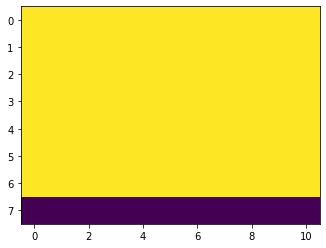

In [35]:
plt.imshow(cellfn(s))

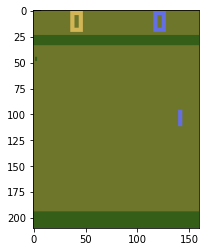

In [34]:
plt.imshow(s)

In [2]:
from tqdm import tqdm
for _ in tqdm(range(20000)):
    found_new_cell = False

    for i in range(100):
        if np.random.random() > 0.95:
            action = env.action_space.sample()

        frame, reward, terminal, info = env.step(action)
        #print(info)
        #if iterations % 100 == 0:
        #    env.render()
        score += reward
        #terminal |= info['lives'] < 6

        trajectory.append(action)
        frames += 1

        if score > highscore:
            highscore = score

        if terminal:
            break
        else:
            cell = cellfn(frame)
            cellhash = hashfn(cell)
            cell = archive[cellhash]
            first_visit = cell.visit()
            if first_visit or score > cell.reward or score == cell.reward and len(trajectory) < len(cell.trajectory):
                cell.ram = env.env.clone_full_state()
                cell.reward = score
                cell.trajectory = trajectory.copy()
                cell.times_chosen = 0
                cell.times_chosen_since_new = 0
                found_new_cell = True

    if found_new_cell and iterations > 0:
        restore_cell.times_chosen_since_new = 0

    iterations += 1
    scores = np.array([cell.score for cell in archive.values()])
    hashes = [*archive]
    probs = scores / scores.sum()
    restore = np.random.choice(hashes, p = probs)
    restore_cell = archive[restore]
    ram, score, trajectory = restore_cell.choose()
    env.reset()
    env.env.restore_full_state(ram)

    if iterations % 500 == 0:
        print("Iterations: %d, Cells: %d, Frames: %d, Max Reward: %d" % (iterations, len(archive), frames, highscore))

  0%|          | 0/20000 [00:00<?, ?it/s]/home/elgutto/Documents/masters/atari/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:353: UserWarning: WARN: `clone_full_state()` is deprecated and will be removed in a future release of `ale-py`. Please use `clone_state(include_rng=True)` which is equivalent to `clone_full_state`. 
  logger.warn(
/home/elgutto/Documents/masters/atari/atari/lib/python3.8/site-packages/gym/envs/atari/environment.py:361: UserWarning: WARN: restore_full_state() is deprecated and will be removed in a future release of `ale-py`. Please use `restore_state(state)` which will restore the state regardless of being a full or partial state. 
  logger.warn(
  3%|▎         | 505/20000 [00:16<11:47, 27.56it/s]

Iterations: 500, Cells: 37, Frames: 50000, Max Reward: 0


  5%|▌         | 1004/20000 [00:32<10:50, 29.21it/s]

Iterations: 1000, Cells: 37, Frames: 100000, Max Reward: 0


  8%|▊         | 1503/20000 [00:49<09:49, 31.38it/s]

Iterations: 1500, Cells: 73, Frames: 150000, Max Reward: 1


 10%|█         | 2003/20000 [01:05<09:31, 31.47it/s]

Iterations: 2000, Cells: 73, Frames: 200000, Max Reward: 1


 13%|█▎        | 2503/20000 [01:21<09:14, 31.53it/s]

Iterations: 2500, Cells: 73, Frames: 250000, Max Reward: 1


 15%|█▌        | 3006/20000 [01:38<09:03, 31.27it/s]

Iterations: 3000, Cells: 73, Frames: 300000, Max Reward: 1


 18%|█▊        | 3503/20000 [01:54<08:54, 30.85it/s]

Iterations: 3500, Cells: 73, Frames: 350000, Max Reward: 2


 20%|██        | 4004/20000 [02:10<08:25, 31.62it/s]

Iterations: 4000, Cells: 73, Frames: 400000, Max Reward: 4


 23%|██▎       | 4505/20000 [02:27<08:11, 31.51it/s]

Iterations: 4500, Cells: 73, Frames: 450000, Max Reward: 4


 25%|██▌       | 5005/20000 [02:43<07:51, 31.78it/s]

Iterations: 5000, Cells: 73, Frames: 500000, Max Reward: 5


 28%|██▊       | 5505/20000 [02:59<07:37, 31.71it/s]

Iterations: 5500, Cells: 73, Frames: 550000, Max Reward: 5


 30%|███       | 6005/20000 [03:15<07:22, 31.62it/s]

Iterations: 6000, Cells: 73, Frames: 600000, Max Reward: 6


 33%|███▎      | 6505/20000 [03:31<07:04, 31.79it/s]

Iterations: 6500, Cells: 73, Frames: 650000, Max Reward: 7


 35%|███▌      | 7005/20000 [03:46<06:50, 31.68it/s]

Iterations: 7000, Cells: 73, Frames: 700000, Max Reward: 8


 38%|███▊      | 7505/20000 [04:02<07:14, 28.76it/s]

Iterations: 7500, Cells: 73, Frames: 750000, Max Reward: 8


 40%|████      | 8003/20000 [04:18<06:18, 31.69it/s]

Iterations: 8000, Cells: 73, Frames: 800000, Max Reward: 10


 43%|████▎     | 8503/20000 [04:34<06:00, 31.89it/s]

Iterations: 8500, Cells: 73, Frames: 850000, Max Reward: 10


 45%|████▌     | 9003/20000 [04:50<05:46, 31.70it/s]

Iterations: 9000, Cells: 73, Frames: 900000, Max Reward: 10


 48%|████▊     | 9503/20000 [05:06<05:32, 31.61it/s]

Iterations: 9500, Cells: 73, Frames: 950000, Max Reward: 10


 50%|█████     | 10003/20000 [05:22<05:15, 31.73it/s]

Iterations: 10000, Cells: 73, Frames: 1000000, Max Reward: 10


 53%|█████▎    | 10503/20000 [05:38<05:00, 31.58it/s]

Iterations: 10500, Cells: 73, Frames: 1050000, Max Reward: 11


 55%|█████▌    | 11006/20000 [05:54<04:46, 31.37it/s]

Iterations: 11000, Cells: 73, Frames: 1100000, Max Reward: 12


 58%|█████▊    | 11503/20000 [06:10<04:27, 31.73it/s]

Iterations: 11500, Cells: 73, Frames: 1150000, Max Reward: 12


 60%|██████    | 12003/20000 [06:26<04:12, 31.70it/s]

Iterations: 12000, Cells: 73, Frames: 1200000, Max Reward: 12


 63%|██████▎   | 12503/20000 [06:42<03:53, 32.10it/s]

Iterations: 12500, Cells: 73, Frames: 1250000, Max Reward: 12


 65%|██████▌   | 13004/20000 [06:58<03:40, 31.71it/s]

Iterations: 13000, Cells: 73, Frames: 1300000, Max Reward: 14


 68%|██████▊   | 13504/20000 [07:13<03:22, 32.06it/s]

Iterations: 13500, Cells: 73, Frames: 1350000, Max Reward: 15


 70%|███████   | 14003/20000 [07:29<03:05, 32.34it/s]

Iterations: 14000, Cells: 73, Frames: 1400000, Max Reward: 15


 73%|███████▎  | 14503/20000 [07:45<02:50, 32.19it/s]

Iterations: 14500, Cells: 73, Frames: 1450000, Max Reward: 16


 75%|███████▌  | 15003/20000 [08:00<02:37, 31.66it/s]

Iterations: 15000, Cells: 73, Frames: 1500000, Max Reward: 16


 78%|███████▊  | 15503/20000 [08:16<02:18, 32.36it/s]

Iterations: 15500, Cells: 73, Frames: 1550000, Max Reward: 16


 80%|████████  | 16003/20000 [08:31<02:04, 32.19it/s]

Iterations: 16000, Cells: 73, Frames: 1600000, Max Reward: 18


 83%|████████▎ | 16503/20000 [08:47<01:48, 32.22it/s]

Iterations: 16500, Cells: 73, Frames: 1650000, Max Reward: 18


 85%|████████▌ | 17006/20000 [09:03<01:32, 32.25it/s]

Iterations: 17000, Cells: 73, Frames: 1700000, Max Reward: 18


 88%|████████▊ | 17503/20000 [09:19<01:17, 32.09it/s]

Iterations: 17500, Cells: 73, Frames: 1750000, Max Reward: 18


 90%|█████████ | 18004/20000 [09:36<01:08, 29.29it/s]

Iterations: 18000, Cells: 73, Frames: 1800000, Max Reward: 18


 93%|█████████▎| 18504/20000 [09:51<00:46, 32.03it/s]

Iterations: 18500, Cells: 73, Frames: 1850000, Max Reward: 18


 95%|█████████▌| 19004/20000 [10:07<00:30, 32.29it/s]

Iterations: 19000, Cells: 73, Frames: 1900000, Max Reward: 18


 98%|█████████▊| 19504/20000 [10:23<00:15, 32.22it/s]

Iterations: 19500, Cells: 73, Frames: 1950000, Max Reward: 18


100%|██████████| 20000/20000 [10:38<00:00, 31.32it/s]

Iterations: 20000, Cells: 73, Frames: 2000000, Max Reward: 18


In [7]:
c = list(archive.values())[1]

In [8]:
c

In [12]:

from gym.envs.classic_control import rendering
def repeat_upsample(rgb_array, k=1, l=1, err=[]):
    # repeat kinda crashes if k/l are zero
    if k <= 0 or l <= 0: 
        if not err: 
            err.append('logged')
        return rgb_array

    # repeat the pixels k times along the y axis and l times along the x axis
    # if the input image is of shape (m,n,3), the output image will be of shape (k*m, l*n, 3)

    return np.repeat(np.repeat(rgb_array, k, axis=0), l, axis=1)

viewer = rendering.SimpleImageViewer()

In [13]:
replay(c.trajectory)

In [10]:
def replay(trajectory):
    env.reset()
    done = False
    for action in trajectory:
        _, _, done, _ = env.step(action)
        
        rgb = env.render('rgb_array')
        img = repeat_upsample(rgb, 4, 4)
        viewer.imshow(img)
        
        if done: break
        
    env.close()

In [14]:
len(c.trajectory)

5756

In [6]:
[cell.reward for cell in archive.values()][1]

18.0